In [1]:
# Import the required libraries
import scipy.io as sio
import matplotlib.pyplot as plt
from os import path
import numpy as np
import pywt
import cv2

%matplotlib inline

In [2]:
# Load the MITBIH_ECG.mat file
ECG_signals = sio.loadmat('dataset\\ecg_signals.mat')
N_signals = ECG_signals['N']
A_signals = ECG_signals['A']
V_signals = ECG_signals['V']
L_signals = ECG_signals['L']
R_signals = ECG_signals['R']

In [6]:
#wavlist = pywt.wavelist(kind='continuous')
#wavlist

In [7]:
#w_list = ['gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl']
#
#test_signal = N_signals[0]
#widths = np.arange(1, 321)
#
#for w_name in w_list:
#  cwt_test_signal, freqs = pywt.cwt(test_signal, widths, w_name)
#  print(w_name)
#  plt.imshow(cwt_test_signal)
#  plt.show()

In [3]:
def cwt_transform(signals, widths = 0, w_name = 'morl'):
  signals_cwt = []

  if widths == 0:
    widths =  np.arange(1, signals[0].shape[0] + 1)

  for sig in signals:
    cwt_sig, freqs = pywt.cwt(sig, widths, w_name)
    signals_cwt.append(cwt_sig)
    
  return np.asarray(signals_cwt)

In [4]:
max_datasize = 2000

In [10]:
#N_signals_cwt = cwt_transform(N_signals[ : max_datasize])
#np.save('dataset\\N_signals_cwt.npy', N_signals_cwt)


In [ ]:
#A_signals_cwt = cwt_transform(A_signals[ : max_datasize])
#np.save('dataset\\A_signals_cwt.npy', A_signals_cwt)

In [ ]:
#V_signals_cwt = cwt_transform(V_signals[ : max_datasize])
#np.save('dataset\\V_signals_cwt.npy', V_signals_cwt)


In [ ]:
#L_signals_cwt = cwt_transform(L_signals[ : max_datasize])
#np.save('dataset\\L_signals_cwt.npy', L_signals_cwt)

In [ ]:
#R_signals_cwt = cwt_transform(R_signals[ : max_datasize])
#np.save('dataset\\R_signals_cwt.npy', R_signals_cwt)

In [5]:
N_signals_cwt = np.load('dataset\\N_signals_cwt.npy')
A_signals_cwt = np.load('dataset\\A_signals_cwt.npy')
V_signals_cwt = np.load('dataset\\V_signals_cwt.npy')
L_signals_cwt = np.load('dataset\\L_signals_cwt.npy')
R_signals_cwt = np.load('dataset\\R_signals_cwt.npy')

In [ ]:
#plt.plot(L_signals[0])
#plt.show()
#plt.imshow(L_signals_cwt[0])
#

In [ ]:
#plt.imshow(N_signals_cwt[0], cmap='hot')

In [ ]:
#r_img = cv2.resize(N_signals_cwt[0], (128,128), interpolation = cv2.INTER_AREA)
#plt.imshow(r_img, cmap='hot')

In [14]:
#img = np.reshape(N_signals_cwt[0], (1, 320, 320))

In [9]:
formatted = (N_signals_cwt[0] * 255 / np.max(N_signals_cwt[0])).astype('uint8')
cv2.imwrite('dataset\\image-222.png', formatted)

# The function cv2.imread() is used to read an image.
img_grayscale = cv2.imread('dataset\\image-222.png',0)

cv2.imshow(img_grayscale)

plt.imshow(img_grayscale)

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


In [16]:
def save_cwt_data(arr, datasize,  data_class, save_path):
  for i in range(datasize):
    resized_img = cv2.resize(arr[i], (128, 128), interpolation = cv2.INTER_AREA)
    reshaped_img = np.reshape(resized_img.astype(np.float32), (1, 128, 128))
    
    np.save(save_path +'/' + data_class + '_' + str(i), reshaped_img)
    
def save_cwt_data_png(arr, datasize,  data_class, save_path):
  for i in range(datasize):
    resized_img = cv2.resize(arr[i], (128, 128), interpolation = cv2.INTER_AREA)
    formatted = (resized_img * 255 / np.max(resized_img)).astype('uint8')
    reshaped_img = np.reshape(formatted.astype(np.float32), (1, 128, 128))
    
    
    np.save(save_path +'/' + data_class + '_' + str(i) + '.png', reshaped_img)

In [17]:
train_size = 1500
val_size = 250
test_size = 250

In [18]:
np.random.shuffle(N_signals_cwt)
np.random.shuffle(A_signals_cwt)
np.random.shuffle(V_signals_cwt)
np.random.shuffle(R_signals_cwt)
np.random.shuffle(L_signals_cwt)

In [19]:
save_cwt_data(N_signals_cwt[train_size + val_size: ], test_size, 'N', 'sh_dataset\\test')
save_cwt_data(A_signals_cwt[train_size + val_size: ], test_size, 'A', 'sh_dataset\\test')
save_cwt_data(V_signals_cwt[train_size + val_size: ], test_size, 'V', 'sh_dataset\\test')
save_cwt_data(R_signals_cwt[train_size + val_size: ], test_size, 'R', 'sh_dataset\\test')
save_cwt_data(L_signals_cwt[train_size + val_size: ], test_size, 'L', 'sh_dataset\\test')

In [20]:
save_cwt_data(N_signals_cwt[train_size : train_size + val_size], val_size, 'N', 'sh_dataset\\validation')
save_cwt_data(A_signals_cwt[train_size : train_size + val_size], val_size, 'A', 'sh_dataset\\validation')
save_cwt_data(V_signals_cwt[train_size : train_size + val_size], val_size, 'V', 'sh_dataset\\validation')
save_cwt_data(R_signals_cwt[train_size : train_size + val_size], val_size, 'R', 'sh_dataset\\validation')
save_cwt_data(L_signals_cwt[train_size : train_size + val_size], val_size, 'L', 'sh_dataset\\validation')

In [21]:
save_cwt_data(N_signals_cwt[ : train_size], train_size, 'N', 'sh_dataset\\train')
save_cwt_data(A_signals_cwt[ : train_size], train_size, 'A', 'sh_dataset\\train')
save_cwt_data(V_signals_cwt[ : train_size], train_size, 'V', 'sh_dataset\\train')
save_cwt_data(R_signals_cwt[ : train_size], train_size, 'R', 'sh_dataset\\train')
save_cwt_data(L_signals_cwt[ : train_size], train_size, 'L', 'sh_dataset\\train')
                                                                             

In [22]:
#save_cwt_data_png(N_signals_cwt[train_size + val_size: ], test_size, 'N', 'alt_dataset\\test')
#save_cwt_data_png(A_signals_cwt[train_size + val_size: ], test_size, 'A', 'alt_dataset\\test')
#save_cwt_data_png(V_signals_cwt[train_size + val_size: ], test_size, 'V', 'alt_dataset\\test')
#save_cwt_data_png(R_signals_cwt[train_size + val_size: ], test_size, 'R', 'alt_dataset\\test')
#save_cwt_data_png(L_signals_cwt[train_size + val_size: ], test_size, 'L', 'alt_dataset\\test')
#
#save_cwt_data_png(N_signals_cwt[train_size : train_size + val_size], val_size, 'N', 'alt_dataset\\validation')
#save_cwt_data_png(A_signals_cwt[train_size : train_size + val_size], val_size, 'A', 'alt_dataset\\validation')
#save_cwt_data_png(V_signals_cwt[train_size : train_size + val_size], val_size, 'V', 'alt_dataset\\validation')
#save_cwt_data_png(R_signals_cwt[train_size : train_size + val_size], val_size, 'R', 'alt_dataset\\validation')
#save_cwt_data_png(L_signals_cwt[train_size : train_size + val_size], val_size, 'L', 'alt_dataset\\validation')
#
#save_cwt_data_png(N_signals_cwt[ : train_size], train_size, 'N', 'alt_dataset\\train')
#save_cwt_data_png(A_signals_cwt[ : train_size], train_size, 'A', 'alt_dataset\\train')
#save_cwt_data_png(V_signals_cwt[ : train_size], train_size, 'V', 'alt_dataset\\train')
#save_cwt_data_png(R_signals_cwt[ : train_size], train_size, 'R', 'alt_dataset\\train')
#save_cwt_data_png(L_signals_cwt[ : train_size], train_size, 'L', 'alt_dataset\\train')

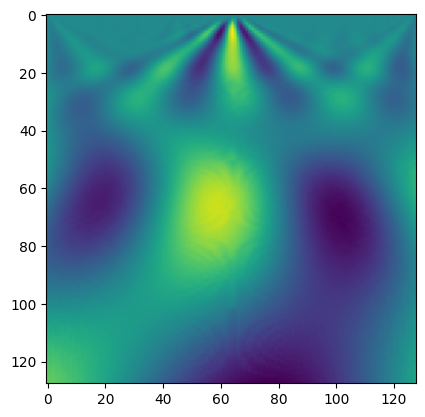

In [23]:
N_0 = np.load('sh_dataset\\train\\N_0.npy')
plt.imshow(N_0[0])

In [24]:
N_0.shape

(1, 128, 128)